<a href="https://colab.research.google.com/github/suhan-s255/SUHAN_S_1BM23CS344_BIS_LAB/blob/main/BIS_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Generation 1:
  Best fitness in this generation: 1042441 (x = 1021)
  Current best solution found: 1111111101 (x = 1021, fitness = 1042441)

Generation 2:
  Best fitness in this generation: 1046529 (x = 1023)
  Current best solution found: 1111111111 (x = 1023, fitness = 1046529)

Generation 3:
  Best fitness in this generation: 1046529 (x = 1023)
  Current best solution found: 1111111111 (x = 1023, fitness = 1046529)

Generation 4:
  Best fitness in this generation: 1046529 (x = 1023)
  Current best solution found: 1111111111 (x = 1023, fitness = 1046529)

Generation 5:
  Best fitness in this generation: 1046529 (x = 1023)
  Current best solution found: 1111111111 (x = 1023, fitness = 1046529)

Generation 6:
  Best fitness in this generation: 1046529 (x = 1023)
  Current best solution found: 1111111111 (x = 1023, fitness = 1046529)

Generation 7:
  Best fitness in this generation: 1046529 (x = 1023)
  Current best solution found: 1111111111 (x = 1023, fitness = 1046529)

Generation 8

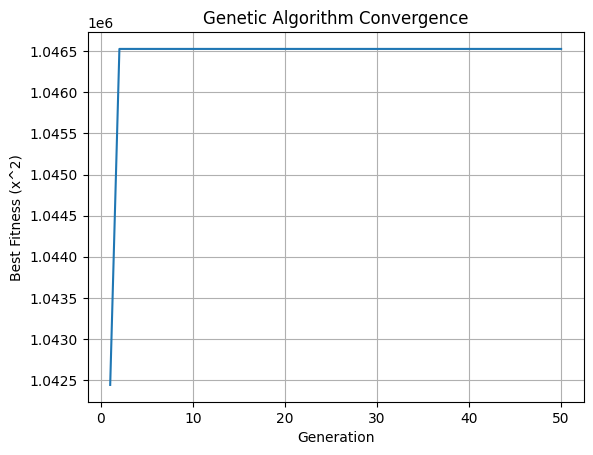

In [32]:
import random

# 2. Initialize Parameters: Set the population size, mutation rate, crossover rate, and number of generations.
pop_size = 500  # Increased population size
chromosome_length = 10 # Length of the binary string representing the solution (2^10 - 1 = 1023)
mutation_rate = 0.01
crossover_rate = 0.7
generations = 50 # Number of generations to run the algorithm

# Define the range for x based on chromosome length (e.g., 5 bits allow values from 0 to 31)
max_x = 2**chromosome_length - 1
min_x = 0


# 3. Create Initial Population: Generate an initial population of potential solutions.
def create_initial_population(pop_size, chromosome_length):
    """Generates an initial population of binary strings."""
    return [''.join(random.choice('01') for _ in range(chromosome_length)) for _ in range(pop_size)]

# 4. Evaluate Fitness: Evaluate the fitness of each individual in the population.
def binary_to_decimal(binary_string):
    """Converts a binary string to its decimal integer value."""
    return int(binary_string, 2)

def evaluate_fitness(population):
    """Evaluates the fitness of each individual in the population using f(x) = x^2."""
    fitness_scores = []
    for chromosome in population:
        x = binary_to_decimal(chromosome)
        # Ensure the value is within the defined range before evaluating fitness
        if x >= min_x and x <= max_x:
            fitness = x**2
            fitness_scores.append(fitness)
        else:
            # Assign a very low fitness for values outside the desired range
            fitness_scores.append(0)
    return fitness_scores

# 5. Selection: Select individuals based on their fitness to reproduce.
def select_parents(population, fitness_scores):
    """Selects parents using roulette wheel selection."""
    total_fitness = sum(fitness_scores)
    # Handle case where total fitness is zero to avoid division by zero
    if total_fitness == 0:
        return random.choices(population, k=len(population))

    selection_probabilities = [score / total_fitness for score in fitness_scores]
    parents_indices = random.choices(range(len(population)), weights=selection_probabilities, k=len(population))
    return [population[i] for i in parents_indices]

# 6. Crossover: Perform crossover between selected individuals to produce offspring.
def crossover(parent1, parent2, crossover_rate):
    """Performs one-point crossover between two parents."""
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        return offspring1, offspring2
    else:
        return parent1, parent2

# 7. Mutation: Apply mutation to the offspring to maintain genetic diversity.
def mutate(chromosome, mutation_rate):
    """Applies mutation to a chromosome."""
    mutated_chromosome = list(chromosome)
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = '1' if mutated_chromosome[i] == '0' else '0'
    return ''.join(mutated_chromosome)


# 8. Iteration and 9. Output the Best Solution:
best_solution = None
best_fitness = -1
best_fitness_per_generation = []

# Main genetic algorithm loop
population = create_initial_population(pop_size, chromosome_length)

for generation in range(generations):
    fitness_scores = evaluate_fitness(population)

    # Track the best solution in the current generation
    # Handle the case where all fitness scores are 0
    if max(fitness_scores) == 0:
        current_best_fitness = 0
        current_best_solution_decimal = "N/A (No viable solution in range)"
        current_best_solution_binary = "N/A"
    else:
        current_best_fitness = max(fitness_scores)
        current_best_index = fitness_scores.index(current_best_fitness)
        current_best_solution_binary = population[current_best_index]
        current_best_solution_decimal = binary_to_decimal(current_best_solution_binary)

    best_fitness_per_generation.append(current_best_fitness)

    if current_best_fitness > best_fitness:
        best_fitness = current_best_fitness
        best_solution = current_best_solution_binary
        best_x = current_best_solution_decimal

    print(f"\nGeneration {generation + 1}:")
    print(f"  Best fitness in this generation: {current_best_fitness} (x = {current_best_solution_decimal})")
    print(f"  Current best solution found: {best_solution} (x = {best_x}, fitness = {best_fitness})")

    # Selection, Crossover, and Mutation for the next generation
    mating_pool = select_parents(population, fitness_scores)
    offspring_population = []
    for i in range(0, len(mating_pool), 2):
        parent1 = mating_pool[i]
        parent2 = mating_pool[i+1]
        offspring1, offspring2 = crossover(parent1, parent2, crossover_rate)
        offspring_population.append(offspring1)
        offspring_population.append(offspring2)

    population = [mutate(chromosome, mutation_rate) for chromosome in offspring_population]

print("\nGenetic Algorithm Finished.")
print(f"Best solution found: {best_solution} (x = {best_x})")
print(f"Maximum fitness: {best_fitness}")


import matplotlib.pyplot as plt

plt.plot(range(1, generations + 1), best_fitness_per_generation)
plt.xlabel("Generation")
plt.ylabel("Best Fitness (x^2)")
plt.title("Genetic Algorithm Convergence")
plt.grid(True)
plt.show()